In [1]:
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

import xarray as xr

In [3]:
ds = xr.tutorial.load_dataset("air_temperature")

# to celsius
air = ds.air - 273.15

# resample from 6-hourly to daily values
air = air.resample(time="D").mean()

air

<xarray.DataArray 'air' (time: 730, lat: 25, lon: 53)>
array([[[-31.2775   , -30.849998 , -30.475002 , ..., -39.7775   ,
         -37.975    , -35.475002 ],
        [-28.575005 , -28.5775   , -28.874996 , ..., -41.9025   ,
         -40.324997 , -36.85     ],
        [-19.149998 , -19.927498 , -21.3275   , ..., -41.675    ,
         -39.454998 , -34.524998 ],
        ...,
        [ 23.15001  ,  22.824997 ,  22.849998 , ...,  22.747505 ,
          22.170013 ,  21.795006 ],
        [ 23.174995 ,  23.574997 ,  23.592514 , ...,  23.022507 ,
          22.850006 ,  22.397507 ],
        [ 23.470009 ,  23.845001 ,  23.950005 , ...,  23.872505 ,
          23.897507 ,  23.82251  ]],

       [[-29.550003 , -29.650005 , -29.849998 , ..., -34.177498 ,
         -32.3525   , -30.0775   ],
        [-25.3275   , -25.95     , -26.927498 , ..., -37.225    ,
         -36.552498 , -34.550003 ],
        [-19.627502 , -21.0775   , -22.852497 , ..., -35.452496 ,
         -34.277496 , -31.25     ],
...
        [ 23.215004 ,  22.265    ,  22.015007 , ...,  23.740005 ,
          23.195007 ,  22.195    ],
        [ 24.3675   ,  24.514992 ,  23.895012 , ...,  23.415    ,
          22.995003 ,  22.269997 ],
        [ 25.417496 ,  25.592499 ,  25.192497 , ...,  23.642502 ,
          23.190002 ,  22.720001 ]],

       [[-28.935001 , -29.535    , -30.385002 , ..., -29.410004 ,
         -28.960003 , -28.46     ],
        [-23.834995 , -24.060001 , -24.559998 , ..., -32.585    ,
         -31.635002 , -30.035004 ],
        [-10.209999 , -10.784988 , -11.434998 , ..., -33.684998 ,
         -31.035    , -27.135002 ],
        ...,
        [ 21.69001  ,  21.990005 ,  23.489998 , ...,  22.265007 ,
          22.015    ,  21.415009 ],
        [ 23.390007 ,  24.439995 ,  24.94001  , ...,  22.415009 ,
          22.315002 ,  21.640007 ],
        [ 24.840012 ,  25.590004 ,  25.54     , ...,  23.065002 ,
          22.715004 ,  22.390007 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2014-12-31
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

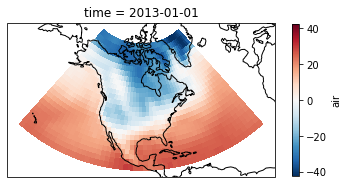

In [4]:
projection = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

f, ax = plt.subplots(subplot_kw=dict(projection=projection))

air.isel(time=0).plot(transform=ccrs.PlateCarree(), cbar_kwargs=dict(shrink=0.7))
ax.coastlines()

In [5]:
weights = np.cos(np.deg2rad(air.lat))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 25)>
array([0.25881907, 0.30070582, 0.34202015, 0.38268346, 0.42261827,
       0.4617486 , 0.49999997, 0.5372996 , 0.57357645, 0.6087614 ,
       0.6427876 , 0.67559016, 0.70710677, 0.7372773 , 0.76604444,
       0.7933533 , 0.81915206, 0.8433914 , 0.8660254 , 0.8870108 ,
       0.90630776, 0.9238795 , 0.9396926 , 0.95371693, 0.9659258 ],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [6]:
air_weighted = air.weighted(weights)
air_weighted

DataArrayWeighted with weights along dimensions: lat

In [7]:
weighted_mean = air_weighted.mean(("lon", "lat"))
weighted_mean

<xarray.DataArray 'air' (time: 730)>
array([ 6.092401 ,  5.527991 ,  5.6512904,  5.7862387,  5.9117665,
        5.683438 ,  5.9767137,  6.456723 ,  6.5710645,  6.504647 ,
        6.134899 ,  5.926867 ,  5.826823 ,  5.7228684,  5.5780067,
        5.4655237,  5.091241 ,  4.9860153,  5.22863  ,  5.2516623,
        5.4277263,  5.3877935,  5.433898 ,  5.364401 ,  5.4685388,
        5.2290297,  5.350286 ,  5.341831 ,  5.37267  ,  5.3595138,
        5.140337 ,  5.055567 ,  5.0724645,  5.23522  ,  5.3184857,
        5.499176 ,  5.720886 ,  5.7286134,  5.7608094,  5.8255615,
        6.268505 ,  6.436903 ,  6.510232 ,  6.5647664,  6.6087837,
        6.4212675,  5.9147425,  5.554678 ,  5.3292165,  5.3359065,
        5.0705895,  5.283736 ,  5.595219 ,  6.05466  ,  6.5307307,
        6.507418 ,  6.3917427,  6.3951273,  6.398088 ,  6.5293736,
        6.4771113,  6.5357656,  6.692519 ,  6.677368 ,  6.5116334,
        6.447034 ,  6.860378 ,  7.437536 ,  7.6981072,  7.4842625,
        7.2581897,  7.135959 ,  7.0934076,  7.267086 ,  7.348537 ,
        7.321788 ,  7.221145 ,  7.2129273,  7.2840424,  7.5433803,
        7.8543735,  8.11584  ,  8.261897 ,  8.111622 ,  8.219127 ,
        8.358713 ,  8.716147 ,  9.151885 ,  9.370044 ,  9.415864 ,
        9.073437 ,  8.820656 ,  8.804643 ,  8.856381 ,  9.0674515,
        9.407149 ,  9.696928 ,  9.742079 ,  9.659618 ,  9.695612 ,
...
       16.536924 , 16.133308 , 16.05551  , 16.100082 , 15.909406 ,
       15.764092 , 15.631486 , 15.827746 , 16.026222 , 16.31987  ,
       16.156448 , 15.898447 , 15.830862 , 15.810078 , 15.589792 ,
       15.309618 , 15.105176 , 14.964679 , 14.966973 , 14.904601 ,
       14.610661 , 14.330113 , 14.255612 , 14.314032 , 13.940103 ,
       13.758864 , 13.820866 , 14.021832 , 13.888188 , 13.724709 ,
       13.190875 , 12.995149 , 12.66984  , 12.585033 , 12.377668 ,
       12.178653 , 12.082314 , 11.874204 , 11.660165 , 11.601137 ,
       11.558611 , 11.183847 , 11.237345 , 11.091917 , 10.472193 ,
        9.898911 ,  9.431238 ,  9.491593 ,  9.688619 ,  9.998573 ,
        9.793551 ,  9.315285 ,  9.2599325,  9.3849945,  9.343003 ,
        9.202585 ,  9.472327 ,  9.424211 ,  9.050674 ,  8.568184 ,
        7.7191467,  7.3312216,  7.451299 ,  7.4235883,  7.518795 ,
        7.4950356,  7.623864 ,  8.083244 ,  8.04913  ,  8.027269 ,
        8.069612 ,  7.9125304,  8.042945 ,  8.34481  ,  8.507071 ,
        8.708197 ,  8.60495  ,  8.312464 ,  8.257239 ,  7.9841394,
        7.693307 ,  7.421975 ,  7.435237 ,  7.482958 ,  7.6428432,
        7.9084682,  8.036132 ,  7.625418 ,  7.7533154,  7.850425 ,
        7.6213007,  6.8473396,  6.4502645,  5.9852395,  5.5805774],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2014-12-31

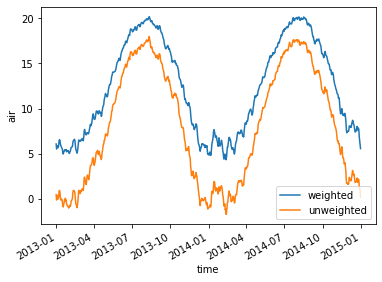

In [8]:
weighted_mean.plot(label="weighted")
air.mean(("lon", "lat")).plot(label="unweighted")

plt.legend()